# Proton Radius Fitting Results As An Animation
by Douglas W. Higinbotham

Code to make animation of the comparision of a global fit and a start-of-the-art physics model to clearly show the radius where the two agree.

In [1]:

import matplotlib.pyplot as plt
import numpy as np

from numpy import sqrt
from PIL import Image

Jose=np.loadtxt('TableSysGEpNew.dat')
ZhihongData=np.loadtxt('GEpALL.dat')


def GetAnyGE(Q2GeV,N):
    GEp_Coef=ZhihongData[N]
    tcut = 0.0779191396
    t0 = -0.7
    z = (sqrt(tcut+Q2GeV)-sqrt(tcut-t0))/(sqrt(tcut+Q2GeV)+sqrt(tcut-t0))
    GEp = sum(GEp_Coef[i]*(z**i) for i in range(len(GEp_Coef)))
    return GEp

def GetGEError(kQ2):
    lnQ2 = np.log10(kQ2)
    lnGNGD_Err=0.0
    if kQ2<1e-3:
        lnGNGD_Err = parL[0] + parL[1]*lnQ2
    elif kQ2>1e2:
        lnGNGD_Err = parH*np.sqrt(lnQ2 - parH[0] + parH[1])
    else:
        lnGNGD_Err = np.array([parM[i]*(lnQ2**i) for i in range(0, len(parM))]).sum() 
    GNGD_Err = 10.**(lnGNGD_Err)    ##LOG10(dG/G(0)/GD)
    return GNGD_Err

parL = np.array([-0.97775297,  0.99685273]) #Low-Q2
parM = np.array([ -1.97750308e+00,  -4.46566998e-01,   2.94508717e-01,   1.54467525e+00,
        9.05268347e-01,  -6.00008111e-01,  -1.10732394e+00,  -9.85982716e-02,
        4.63035988e-01,   1.37729116e-01,  -7.82991627e-02,  -3.63056932e-02,
        2.64219326e-03,   3.13261383e-03,   3.89593858e-04 ]) #Mid-Q2:
parH = np.array([ 0.78584754,  1.89052183, -0.4104746]) #High-Q2

np.seterr(divide='ignore')
nq2=np.linspace(0,1,1000)

errors=[]
for i in range(len(nq2)):
    qq=nq2[i]
    errors.append(GetGEError(qq))
errors=np.array(errors)

First create a grid of plots show the results of the global fits as well as the theory where in each panel the radius has been fixed to the same value.

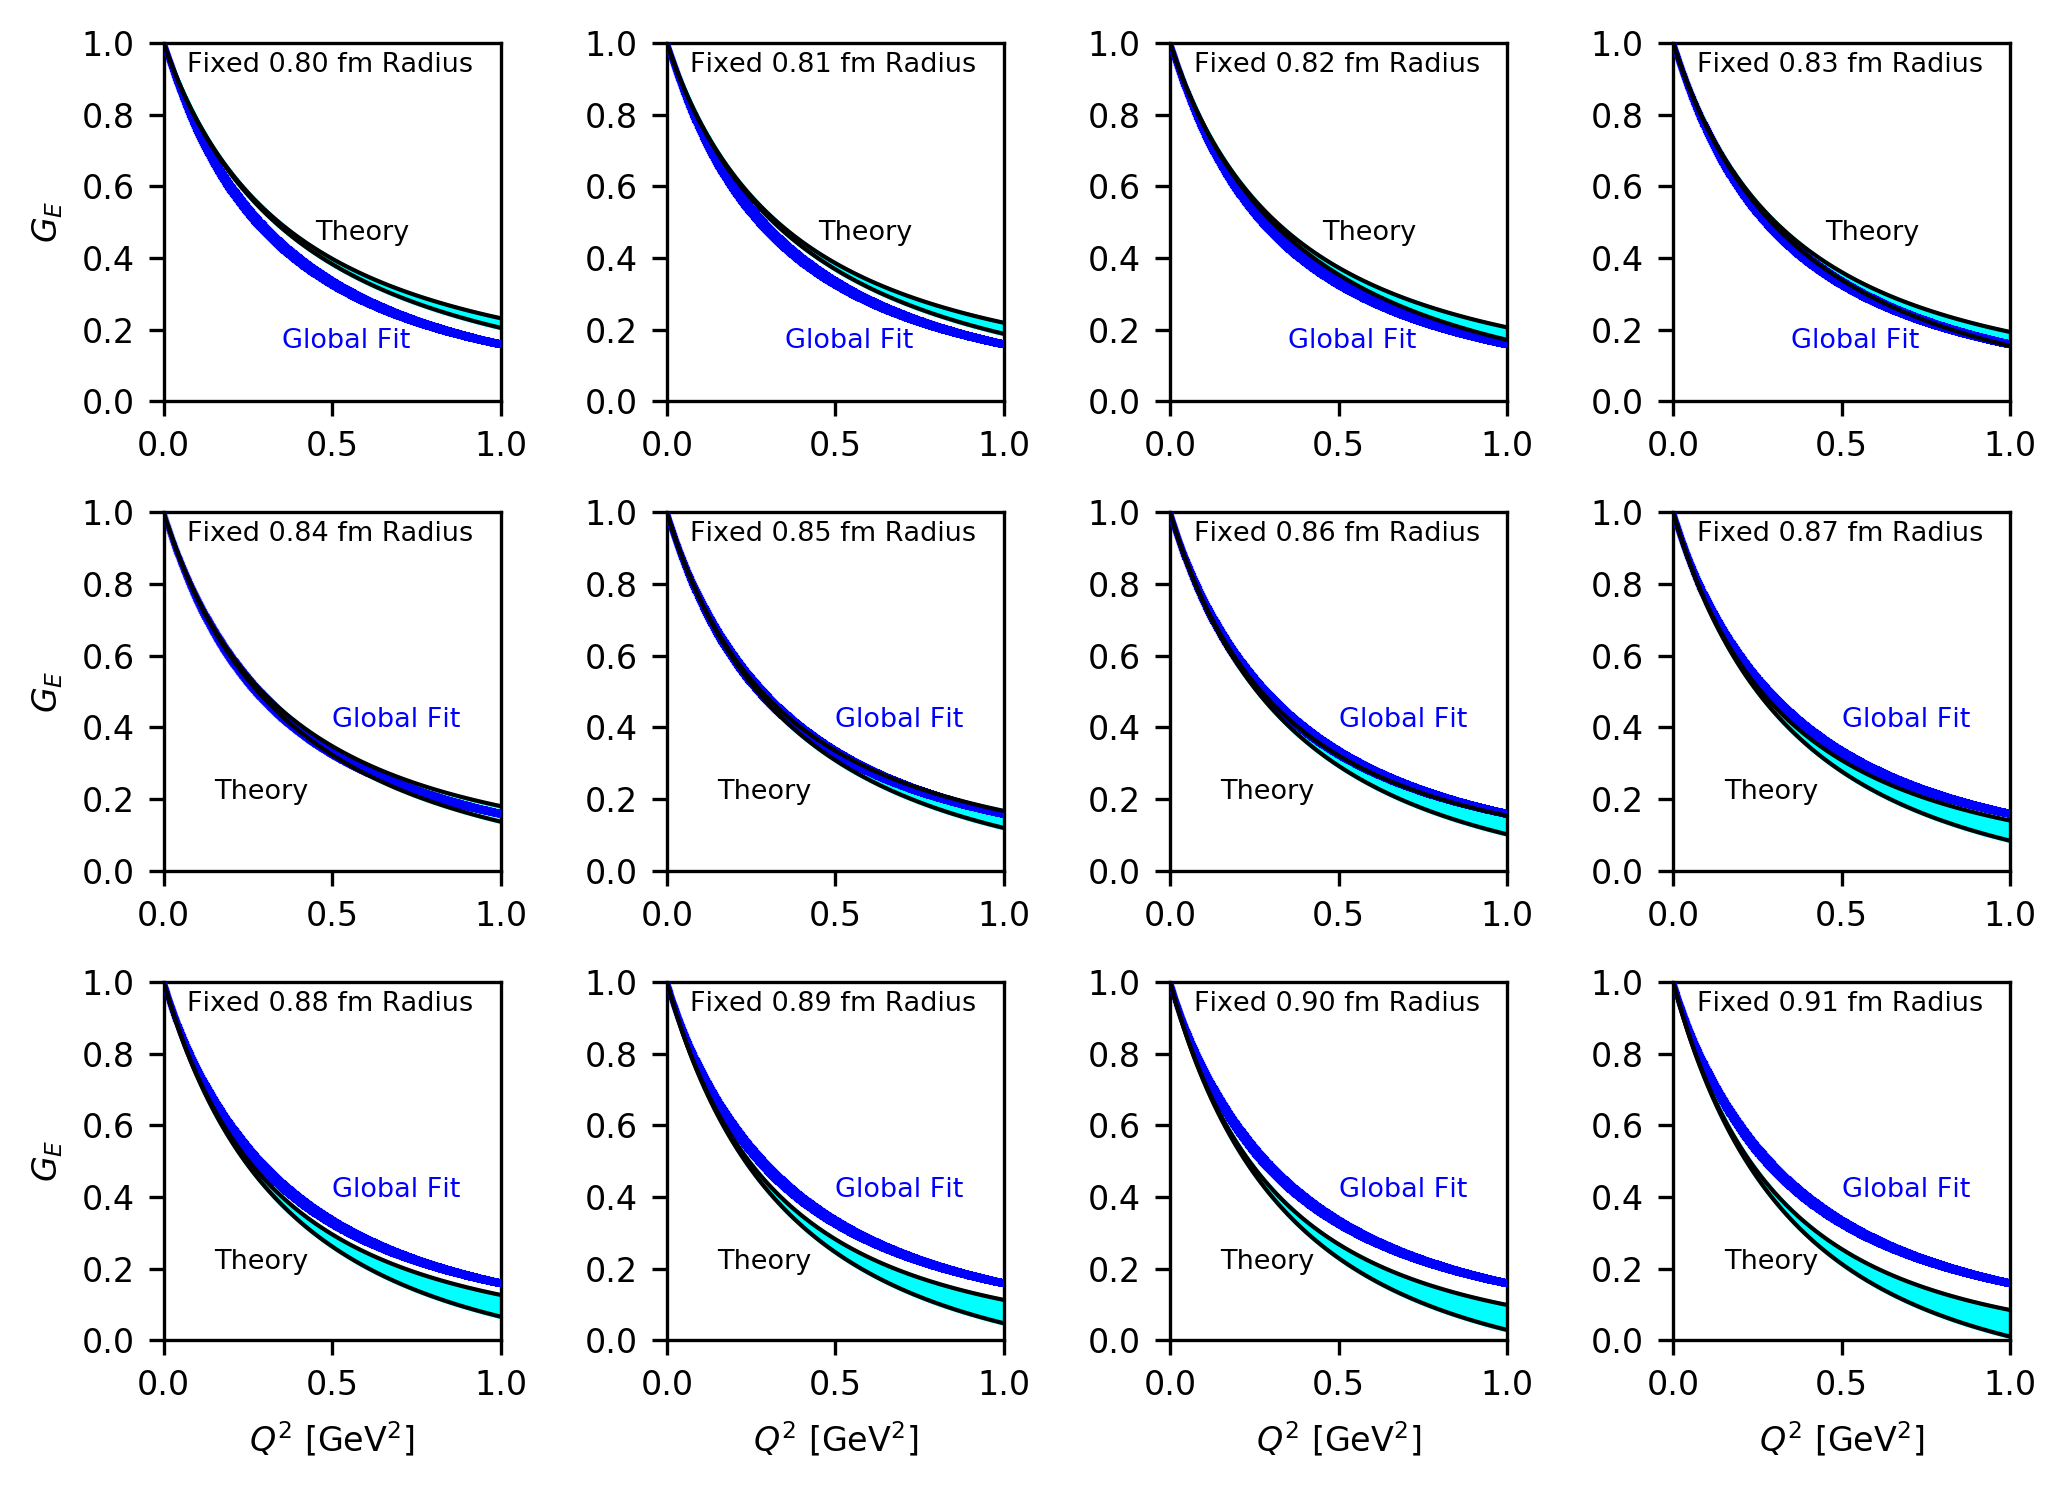

In [2]:
#  by 4 grid of plots

font = {'family' : 'Dejavu Sans',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)


plt.figure(dpi=300,figsize=[7,5])

plt.subplot(341)
plt.fill_between(Jose[:,0],Jose[:,2],Jose[:,3],color='cyan',zorder=1,lw=1)
plt.plot(Jose[:,0],Jose[:,2],'-',color='black',label='0.80 fm',ms=1,zorder=11,lw=1)
plt.plot(Jose[:,0],Jose[:,3],'-',color='black',ms=1,zorder=11,lw=1)
plt.errorbar(nq2,GetAnyGE(nq2,0),yerr=errors,color='blue',ms=1,zorder=6)#,label='Global Fit Ye With Error Band')
#plt.xlabel('$Q^2$ [GeV$^2$]')
plt.ylabel('$G_E$')
plt.annotate('Fixed 0.80 fm Radius',xy=[0.07,0.92],size=6.5)
plt.annotate('Theory',xy=[0.45,0.45],size=6.5,color='black')
plt.annotate('Global Fit',xy=[0.35,0.15],size=6.5,color='blue')
plt.xlim(0,1)
plt.ylim(0,1)

plt.subplot(342)
plt.fill_between(Jose[:,0],Jose[:,5],Jose[:,6],color='cyan',zorder=1,lw=1)
#plt.plot(Jose[:,0],Jose[:,4],'.',color='green',ms=1,zorder=11)
plt.plot(Jose[:,0],Jose[:,5],'-',color='black',label='0.82 fm',zorder=11,ms=1,lw=1)
plt.plot(Jose[:,0],Jose[:,6],'-',color='black',zorder=11,ms=1,lw=1)
plt.errorbar(nq2,GetAnyGE(nq2,1),yerr=errors,color='blue',zorder=10,ms=1)#,label='Global Fit Ye With Error Band')
#plt.xlabel('$Q^2$ [GeV$^2$]')
#plt.ylabel('$G_E$')
plt.annotate('Fixed 0.81 fm Radius',xy=[0.07,0.92],size=6.5)
plt.annotate('Theory',xy=[0.45,0.45],size=6.5,color='black')
plt.annotate('Global Fit',xy=[0.35,0.15],size=6.5,color='blue')
plt.xlim(0,1)
plt.ylim(0,1)

plt.subplot(343)
plt.fill_between(Jose[:,0],Jose[:,8],Jose[:,9],color='cyan',zorder=1,lw=1)
#plt.plot(Jose[:,0],Jose[:,7],'.',color='blue',ms=0.5)
plt.plot(Jose[:,0],Jose[:,8],'-',color='black',label='0.84 fm',ms=1,zorder=11,lw=1)
plt.plot(Jose[:,0],Jose[:,9],'-',color='black',ms=1,zorder=11,lw=1)
plt.errorbar(nq2,GetAnyGE(nq2,2),yerr=errors,color='blue',zorder=6,ms=0.5)#,label='Global Fit Ye With Error Band')
#plt.xlabel('$Q^2$ [GeV$^2$]')
#plt.ylabel('$G_E$')
plt.annotate('Fixed 0.82 fm Radius',xy=[0.07,0.92],size=6.5)
plt.annotate('Theory',xy=[0.45,0.45],size=6.5,color='black')
plt.annotate('Global Fit',xy=[0.35,0.15],size=6.5,color='blue')
plt.xlim(0,1.0)
plt.ylim(0,1)

plt.subplot(344)
plt.fill_between(Jose[:,0],Jose[:,11],Jose[:,12],color='cyan',zorder=1,lw=1)
#plt.plot(Jose[:,0],Jose[:,10],'.',color='blue',ms=0.5)
plt.plot(Jose[:,0],Jose[:,11],'-',color='black',label='0.86 fm',ms=1,zorder=11,lw=1)
plt.plot(Jose[:,0],Jose[:,12],'-',color='black',ms=1,zorder=11,lw=1)
plt.errorbar(nq2,GetAnyGE(nq2,3),yerr=errors,color='blue',ms=1,zorder=6)#,label='Global Fit Ye With Error Band')
#plt.xlabel('$Q^2$ [GeV$^2$]')
#plt.ylabel('$G_E$')
plt.annotate('Fixed 0.83 fm Radius',xy=[0.07,0.92],size=6.5)
plt.annotate('Theory',xy=[0.45,0.45],size=6.5,color='black')
plt.annotate('Global Fit',xy=[0.35,0.15],size=6.5,color='blue')
plt.xlim(0,1)
plt.ylim(0,1)

plt.subplot(345)
plt.fill_between(Jose[:,0],Jose[:,14],Jose[:,15],color='cyan',zorder=1,lw=1,alpha=0.5)
#plt.plot(Jose[:,0],Jose[:,13],'.',color='blue',ms=0.5)
plt.plot(Jose[:,0],Jose[:,14],'-',color='black',label='0.88 fm',zorder=11,ms=1,lw=1)
plt.plot(Jose[:,0],Jose[:,15],'-',color='black',zorder=11,ms=1,lw=1)
plt.errorbar(nq2,GetAnyGE(nq2,4),yerr=errors,color='blue',zorder=10,ms=1,alpha=0.5)#,label='Global Fit Ye With Error Band')
#plt.xlabel('$Q^2$ [GeV$^2$]')
plt.ylabel('$G_E$')
plt.annotate('Fixed 0.84 fm Radius',xy=[0.07,0.92],size=6.5)
plt.annotate('Theory',xy=[0.15,0.2],size=6.5,color='black')
plt.annotate('Global Fit',xy=[0.5,0.4],size=6.5,color='blue')
plt.xlim(0,1)
plt.ylim(0,1)

plt.subplot(3,4,6)
plt.fill_between(Jose[:,0],Jose[:,17],Jose[:,18],color='cyan',zorder=1,lw=1)
#plt.plot(Jose[:,0],Jose[:,16],'.',color='blue',ms=0.5)
plt.plot(Jose[:,0],Jose[:,17],'-',color='black',label='0.90 fm',ms=1,lw=1,zorder=11)
plt.plot(Jose[:,0],Jose[:,18],'-',color='black',ms=1,lw=1,zorder=11)
plt.errorbar(nq2,GetAnyGE(nq2,5),yerr=errors,color='blue',zorder=6,ms=0.5)#,label='Global Fit Ye With Error Band')
#plt.xlabel('$Q^2$ [GeV$^2$]')
#plt.ylabel('$G_E$')
plt.annotate('Fixed 0.85 fm Radius',xy=[0.07,0.92],size=6.5)
plt.annotate('Theory',xy=[0.15,0.2],size=6.5,color='black')
plt.annotate('Global Fit',xy=[0.5,0.4],size=6.5,color='blue')
plt.xlim(0,1.0)
plt.ylim(0,1)

plt.subplot(3,4,7)
plt.fill_between(Jose[:,0],Jose[:,20],Jose[:,21],color='cyan',zorder=1,lw=1)
#plt.plot(Jose[:,0],Jose[:,19],'.',color='blue',ms=0.5)
plt.plot(Jose[:,0],Jose[:,20],'-',color='black',label='0.90 fm',ms=1,lw=1,zorder=11)
plt.plot(Jose[:,0],Jose[:,21],'-',color='black',ms=1,lw=1,zorder=11)
plt.errorbar(nq2,GetAnyGE(nq2,5),yerr=errors,color='blue',zorder=6,ms=0.5)#,label='Global Fit Ye With Error Band')
#plt.xlabel('$Q^2$ [GeV$^2$]')
#plt.ylabel('$G_E$')
plt.annotate('Fixed 0.86 fm Radius',xy=[0.07,0.92],size=6.5)
plt.annotate('Theory',xy=[0.15,0.2],size=6.5,color='black')
plt.annotate('Global Fit',xy=[0.5,0.4],size=6.5,color='blue')
plt.xlim(0,1.0)
plt.ylim(0,1)

plt.subplot(3,4,8)
plt.fill_between(Jose[:,0],Jose[:,23],Jose[:,24],color='cyan',zorder=1,lw=1)
#plt.plot(Jose[:,0],Jose[:,22],'.',color='blue',ms=0.5)
plt.plot(Jose[:,0],Jose[:,23],'-',color='black',label='0.90 fm',ms=1,lw=1,zorder=11)
plt.plot(Jose[:,0],Jose[:,24],'-',color='black',ms=1,lw=1,zorder=11)
plt.errorbar(nq2,GetAnyGE(nq2,5),yerr=errors,color='blue',zorder=6,ms=0.5)#,label='Global Fit Ye With Error Band')
#plt.xlabel('$Q^2$ [GeV$^2$]')
#plt.ylabel('$G_E$')
plt.annotate('Fixed 0.87 fm Radius',xy=[0.07,0.92],size=6.5)
plt.annotate('Theory',xy=[0.15,0.2],size=6.5,color='black')
plt.annotate('Global Fit',xy=[0.5,0.4],size=6.5,color='blue')
plt.xlim(0,1.0)
plt.ylim(0,1)

plt.subplot(3,4,9)
plt.fill_between(Jose[:,0],Jose[:,26],Jose[:,27],color='cyan',zorder=1,lw=1)
#plt.plot(Jose[:,0],Jose[:,25],'.',color='blue',ms=0.5)
plt.plot(Jose[:,0],Jose[:,26],'-',color='black',label='0.90 fm',ms=1,lw=1,zorder=11)
plt.plot(Jose[:,0],Jose[:,27],'-',color='black',ms=1,lw=1,zorder=11)
plt.errorbar(nq2,GetAnyGE(nq2,5),yerr=errors,color='blue',zorder=6,ms=0.5)#,label='Global Fit Ye With Error Band')
plt.xlabel('$Q^2$ [GeV$^2$]')
plt.ylabel('$G_E$')
plt.annotate('Fixed 0.88 fm Radius',xy=[0.07,0.92],size=6.5)
plt.annotate('Theory',xy=[0.15,0.2],size=6.5,color='black')
plt.annotate('Global Fit',xy=[0.5,0.4],size=6.5,color='blue')
plt.xlim(0,1.0)
plt.ylim(0,1)

plt.subplot(3,4,10)
plt.fill_between(Jose[:,0],Jose[:,29],Jose[:,30],color='cyan',zorder=1,lw=1)
#plt.plot(Jose[:,0],Jose[:,28],'.',color='blue',ms=0.5)
plt.plot(Jose[:,0],Jose[:,29],'-',color='black',label='0.90 fm',ms=1,lw=1,zorder=11)
plt.plot(Jose[:,0],Jose[:,30],'-',color='black',ms=1,lw=1,zorder=11)
plt.errorbar(nq2,GetAnyGE(nq2,5),yerr=errors,color='blue',zorder=6,ms=0.5)#,label='Global Fit Ye With Error Band')
plt.xlabel('$Q^2$ [GeV$^2$]')
#plt.ylabel('$G_E$')
plt.annotate('Fixed 0.89 fm Radius',xy=[0.07,0.92],size=6.5)
plt.annotate('Theory',xy=[0.15,0.2],size=6.5,color='black')
plt.annotate('Global Fit',xy=[0.5,0.4],size=6.5,color='blue')
plt.xlim(0,1.0)
plt.ylim(0,1)

plt.subplot(3,4,11)
plt.fill_between(Jose[:,0],Jose[:,32],Jose[:,33],color='cyan',zorder=1,lw=1)
#plt.plot(Jose[:,0],Jose[:,31],'.',color='blue',ms=0.5)
plt.plot(Jose[:,0],Jose[:,32],'-',color='black',label='0.90 fm',ms=1,lw=1,zorder=11)
plt.plot(Jose[:,0],Jose[:,33],'-',color='black',ms=1,lw=1,zorder=11)
plt.errorbar(nq2,GetAnyGE(nq2,5),yerr=errors,color='blue',zorder=6,ms=0.5)#,label='Global Fit Ye With Error Band')
plt.xlabel('$Q^2$ [GeV$^2$]')
#plt.ylabel('$G_E$')
plt.annotate('Fixed 0.90 fm Radius',xy=[0.07,0.92],size=6.5)
plt.annotate('Theory',xy=[0.15,0.2],size=6.5,color='black')
plt.annotate('Global Fit',xy=[0.5,0.4],size=6.5,color='blue')
plt.xlim(0,1.0)
plt.ylim(0,1)

plt.subplot(3,4,12)
plt.fill_between(Jose[:,0],Jose[:,35],Jose[:,36],color='cyan',zorder=1,lw=1)
#plt.plot(Jose[:,0],Jose[:,34],'.',color='blue',ms=0.5)
plt.plot(Jose[:,0],Jose[:,35],'-',color='black',label='0.90 fm',ms=1,lw=1,zorder=11)
plt.plot(Jose[:,0],Jose[:,36],'-',color='black',ms=1,lw=1,zorder=11)
plt.errorbar(nq2,GetAnyGE(nq2,5),yerr=errors,color='blue',zorder=6,ms=0.5)#,label='Global Fit Ye With Error Band')
plt.xlabel('$Q^2$ [GeV$^2$]')
#plt.ylabel('$G_E$')
plt.annotate('Fixed 0.91 fm Radius',xy=[0.07,0.92],size=6.5)
plt.annotate('Theory',xy=[0.15,0.2],size=6.5,color='black')
plt.annotate('Global Fit',xy=[0.5,0.4],size=6.5,color='blue')
plt.xlim(0,1.0)
plt.ylim(0,1)

plt.tight_layout()
plt.savefig('Goldilocks.png')

plt.show()

Now make an animation to show the same information.

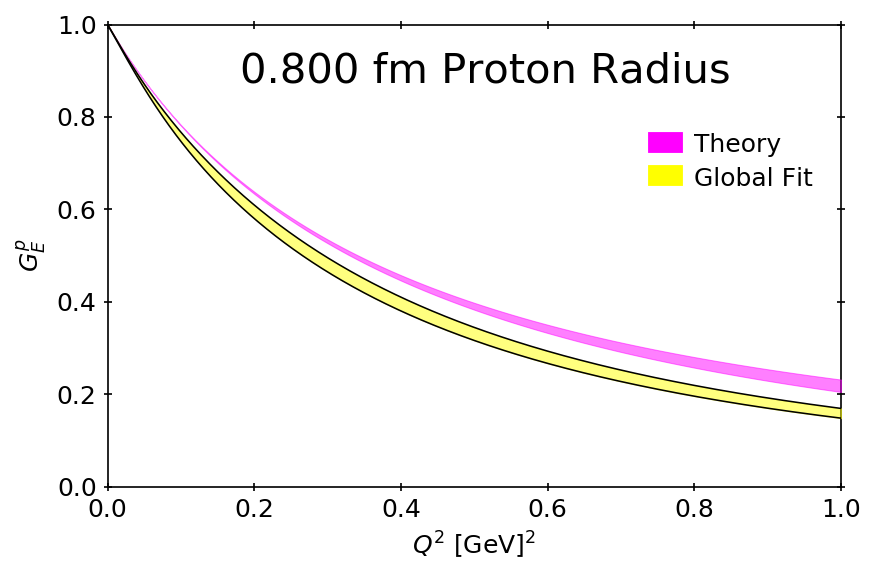

In [3]:

font = {'family' : 'Dejavu Sans',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)


def animate1(frame):
    plt.clf()
    #print('frame =',frame)
    if frame%2 == 0:
        #print('one')
        i=int(np.trunc(frame/2))
        #print("i =",i)
        j=i*3
        ii=0
        plt.fill_between(Jose[:,0],Jose[:,2+j],Jose[:,3+j],color='magenta',zorder=10,lw=0.5,alpha=0.5)
    if frame%2 == 1:
        #print('two')
        i=int(np.trunc(frame/2))
        #print("i =",i)
        j=i*3
        jj=j+3
        ii=0.005
        plt.fill_between(Jose[:,0],(Jose[:,2+j]+Jose[:,2+jj])/2,(Jose[:,3+j]+Jose[:,3+jj])/2,color='magenta',zorder=10,lw=0.5,alpha=0.5)
    plt.fill_between(nq2,GetAnyGE(nq2,i)+errors,GetAnyGE(nq2,i)-errors,color='yellow',zorder=10,lw=0.5,alpha=0.5) 
    plt.plot(nq2,GetAnyGE(nq2,i)+errors,lw=0.75,zorder=12,color='black')#,label='Global Fit Ye With Error Band')
    plt.plot(nq2,GetAnyGE(nq2,i)-errors,lw=0.75,zorder=12,color='black')#,label='Global Fit Ye With Error Band')
    plt.ylabel('$G_E^p$')
    plt.xlabel('$Q^2$ [GeV]$^2$')
    plt.annotate('%0.3f fm Proton Radius'%(0.80+0.01*i+ii),xy=[0.18,0.875],size=20)
    plt.annotate('Theory',xy=[0.8,0.725],size=12,color='black')
    plt.annotate('Global Fit',xy=[0.8,0.65],size=12,color='black')
    plt.tick_params(axis='y', which='both',tick2On=True,tickdir="inout")
    plt.tick_params(axis='x', which='both',tick2On=True,tickdir="inout")
    plt.plot([0.75,0.77],[0.745,0.745],lw=10,color='magenta')
    plt.plot([0.75,0.77],[0.675,0.675],lw=10,color='yellow')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.tight_layout()

from matplotlib import animation
fig=plt.figure(dpi=150,figsize=[6,4])
anim = animation.FuncAnimation(fig, animate1, frames=21, repeat=False)#,blit=True)
anim.save('Goldilocks.gif', writer='imagemagick', fps=2.)

plt.show()


## References

The details of the physics can be found in the open access Phys. Rev. C article:

J. M. Alarcón, D. W. Higinbotham, C. Weiss, and Zhihong Ye
Phys. Rev. C 99, 044303 – Published 5 April 2019
https://doi.org/10.1103/PhysRevC.99.044303

D. Higinbotham made the animation for the JLab press release that went along with the paper and it used by phys.org:
https://phys.org/news/2019-06-physicists-team-tackle-proton-radius.html

The plots are referred to in the code as "Goldilocks" since the point was to show which proton radius is just right. 





